Labeled data: Data consisting of a set of training examples, where each example is a pair consisting of an input and a desired output value (also called the supervisory signal, labels, etc)
Classification: The goal is to predict discrete values, e.g. {1,0}, {True, False}, {spam, not spam}.
Regression: The goal is to predict continuous values, e.g. home prices.


In [11]:
import numpy as np
import pandas as pd 
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [5]:
r= pd.read_csv('recepies.csv')
r.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


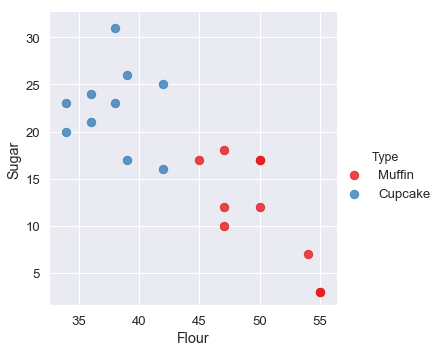

In [9]:
sns.lmplot('Flour', 'Sugar', data=r, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [13]:
type_label = np.where (r['Type']=='Muffin', 0,1)
r_features=r.columns.values[1:].tolist()
r_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [14]:
ingr=r[['Flour', 'Sugar']].values
print(ingr)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [16]:
#fit model
model = svm.SVC(kernel='linear')
model.fit(ingr, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
#get the sepdating hyperplane
w=model.coef_[0]
a= -w[0]/w[1]
xx=np.linspace(30, 60)
yy=a*xx - (model.intercept_[0])/w[1]
print(yy)

[ 1.15779472e+16  1.10528750e+16  1.05278028e+16  1.00027306e+16
  9.47765844e+15  8.95258624e+15  8.42751405e+15  7.90244185e+15
  7.37736965e+15  6.85229746e+15  6.32722526e+15  5.80215306e+15
  5.27708087e+15  4.75200867e+15  4.22693647e+15  3.70186428e+15
  3.17679208e+15  2.65171988e+15  2.12664769e+15  1.60157549e+15
  1.07650329e+15  5.51431096e+14  2.63588995e+13 -4.98713297e+14
 -1.02378549e+15 -1.54885769e+15 -2.07392989e+15 -2.59900208e+15
 -3.12407428e+15 -3.64914648e+15 -4.17421867e+15 -4.69929087e+15
 -5.22436307e+15 -5.74943526e+15 -6.27450746e+15 -6.79957966e+15
 -7.32465185e+15 -7.84972405e+15 -8.37479625e+15 -8.89986844e+15
 -9.42494064e+15 -9.95001284e+15 -1.04750850e+16 -1.10001572e+16
 -1.15252294e+16 -1.20503016e+16 -1.25753738e+16 -1.31004460e+16
 -1.36255182e+16 -1.41505904e+16]


In [19]:
#plot the parallels to the separating hyperplane that pass through the support vector
b=model.support_vectors_[0]
yy_down=a*xx + (b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up=a*xx+(b[1]-a*b[0])
print(yy_up)

[ 1.02914151e+16  9.76634286e+15  9.24127066e+15  8.71619846e+15
  8.19112627e+15  7.66605407e+15  7.14098187e+15  6.61590968e+15
  6.09083748e+15  5.56576528e+15  5.04069309e+15  4.51562089e+15
  3.99054869e+15  3.46547650e+15  2.94040430e+15  2.41533210e+15
  1.89025991e+15  1.36518771e+15  8.40115515e+14  3.15043318e+14
 -2.10028879e+14 -7.35101075e+14 -1.26017327e+15 -1.78524547e+15
 -2.31031767e+15 -2.83538986e+15 -3.36046206e+15 -3.88553426e+15
 -4.41060645e+15 -4.93567865e+15 -5.46075085e+15 -5.98582304e+15
 -6.51089524e+15 -7.03596743e+15 -7.56103963e+15 -8.08611183e+15
 -8.61118402e+15 -9.13625622e+15 -9.66132842e+15 -1.01864006e+16
 -1.07114728e+16 -1.12365450e+16 -1.17616172e+16 -1.22866894e+16
 -1.28117616e+16 -1.33368338e+16 -1.38619060e+16 -1.43869782e+16
 -1.49120504e+16 -1.54371226e+16]


In [20]:
print(yy_down)

[ 1.28642688e+16  1.23391966e+16  1.18141244e+16  1.12890522e+16
  1.07639800e+16  1.02389078e+16  9.71383564e+15  9.18876344e+15
  8.66369124e+15  8.13861905e+15  7.61354685e+15  7.08847465e+15
  6.56340246e+15  6.03833026e+15  5.51325806e+15  4.98818587e+15
  4.46311367e+15  3.93804147e+15  3.41296928e+15  2.88789708e+15
  2.36282488e+15  1.83775269e+15  1.31268049e+15  7.87608295e+14
  2.62536098e+14 -2.62536098e+14 -7.87608295e+14 -1.31268049e+15
 -1.83775269e+15 -2.36282488e+15 -2.88789708e+15 -3.41296928e+15
 -3.93804147e+15 -4.46311367e+15 -4.98818587e+15 -5.51325806e+15
 -6.03833026e+15 -6.56340246e+15 -7.08847465e+15 -7.61354685e+15
 -8.13861905e+15 -8.66369124e+15 -9.18876344e+15 -9.71383564e+15
 -1.02389078e+16 -1.07639800e+16 -1.12890522e+16 -1.18141244e+16
 -1.23391966e+16 -1.28642688e+16]


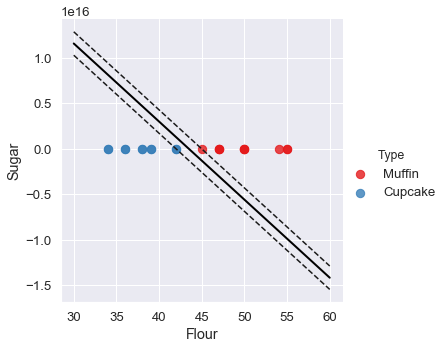

In [25]:
sns.lmplot('Flour', 'Sugar', data=r, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx,yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')


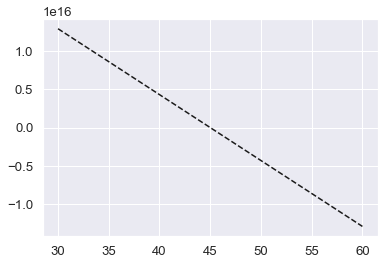

In [23]:
plt.plot(xx, yy_down, 'k--')

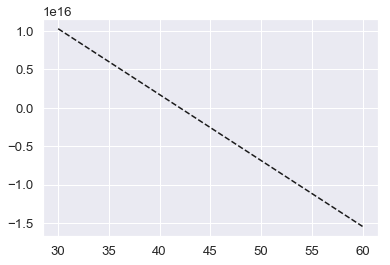

In [24]:
plt.plot(xx, yy_up, 'k--')

In [31]:
# create a function to predict muffic of cupcake 
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print ('You\'re looking at a muffin recipe!')
    else: 
        print('You\'re looking at a cupcake recipe!')
            
#predict if 50 parts offlour and 20 parts sugar
muffin_or_cupcake(50,20)

You're looking at a muffin recipe!


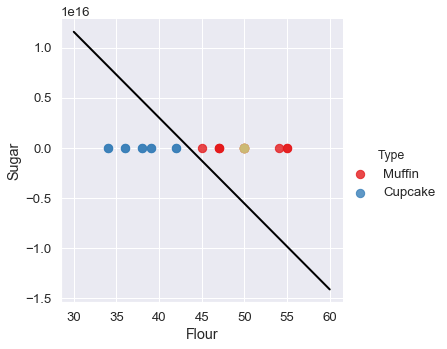

In [32]:
# plot it on the graph
#plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=r, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx,yy, linewidth=2, color='black')
plt.plot(50,20, 'yo', markersize='9')